<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Прогнозирование  заказов такси 

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка данных

Импортируем необходимые нам библиотеки

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt


Прочитаем датасет

In [2]:
#data = pd.read_csv('/datasets/taxi.csv')
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
#data.sort_index(inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


Проведём ресемплирование по одному часу:

In [4]:
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


Проведём ресемплинг по каждому часу

In [6]:
data = data.resample('1H').sum()
data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


In [7]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB


In [9]:
data = data.dropna(subset = ['num_orders'])
data['num_orders'].isnull().sum()

0

In [10]:
data.head(100)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-03-04 23:00:00,68
2018-03-05 00:00:00,86
2018-03-05 01:00:00,176


## Анализ данных

Построим декомпозицию для каждого месяца

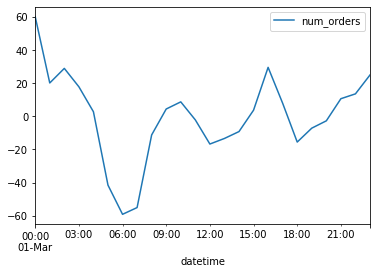

In [11]:
decomposed = seasonal_decompose(data)

decomposed.seasonal['2018-03-01':'2018-03-01'].plot()

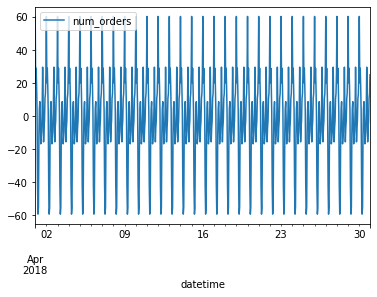

In [12]:
decomposed.seasonal['2018-04-01':'2018-04-30'].plot()

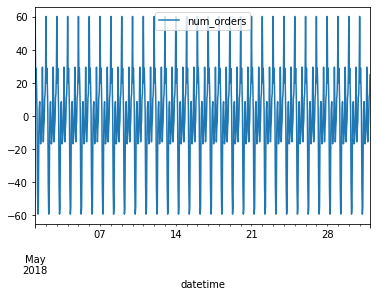

In [13]:
decomposed.seasonal['2018-05-01':'2018-05-31'].plot()

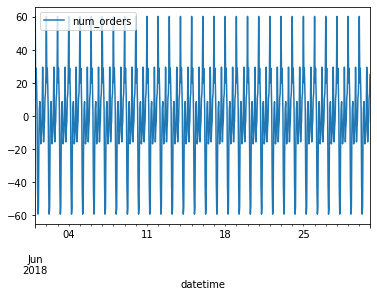

In [14]:
decomposed.seasonal['2018-06-01':'2018-06-30'].plot()

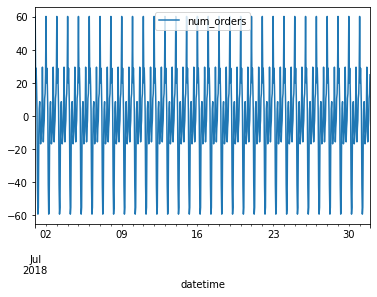

In [15]:
decomposed.seasonal['2018-07-01':'2018-07-31'].plot()

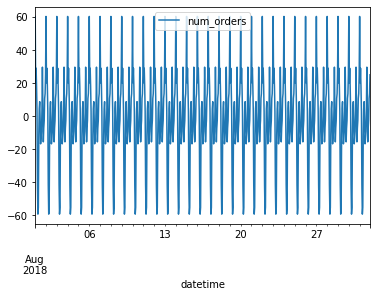

In [16]:
decomposed.seasonal['2018-08-01':'2018-08-31'].plot()

Посмотрим так же и для десяти дней апреля месяца

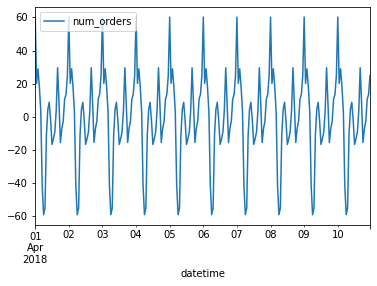

In [17]:
decomposed.seasonal['2018-04-01':'2018-04-10'].plot()

Наблюдаем сезонность по дням. Выводы по месячной сезонности делать не можем, так как не хватает данных - их меньше года.
Стохастический процесс

## Обучение моделей

Создадим признаки для горизонта прогнозирования в один шаг.
Напишем функцию для создания признаков.

In [18]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


make_features(data, 2, 24)

Проверим на модели Линейной Регрессии

In [19]:
train, test = train_test_split(data, shuffle=False, test_size=0.2)
train = train.dropna()

target_train = train['num_orders']
features_train = train.drop(['num_orders'],axis = 1)

target_test = test['num_orders']
features_test = test.drop(['num_orders'],axis = 1)

model = LinearRegression()
model.fit(features_train,target_train)

predicted_train = model.predict(features_train)
predicted_test = model.predict(features_test)

print("MAE обучающей выборки:", mean_absolute_error(target_train,predicted_train))
print("MAE тестовой выборки: ", mean_absolute_error(target_test,predicted_test))
print("RMSE обучающей выборки:", mean_squared_error(target_train,predicted_train)**0.5)
print("RMSE тестовой выборки:", mean_squared_error(target_test,predicted_test)**0.5)

MAE обучающей выборки: 22.776263666099975
MAE тестовой выборки:  35.09421392180191
RMSE обучающей выборки: 29.33311504642901
RMSE тестовой выборки: 46.6829464887083


Построим по два графика - недельный прогноз и двухдневный для каждой модели

Text(0, 0.5, 'Число заказов')

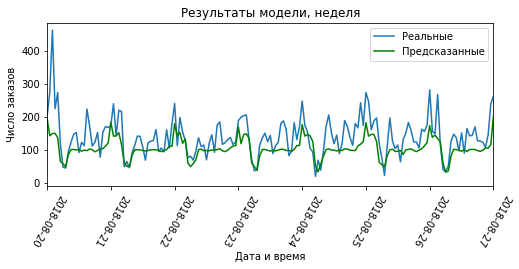

In [37]:
predictions1 = pd.Series(predicted_test)
predictions1.index = target_test.index

fig2, ax = plt.subplots(figsize=(8, 3))
ax = sns.lineplot(data=target_test, label='Реальные')
sns.lineplot(data=predictions, color='green', label='Предсказанные')
plt.xticks(rotation=240)
plt.xlim('2018-08-20', '2018-08-27')
plt.title('Результаты модели, неделя')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')

Text(0, 0.5, 'Число заказов')

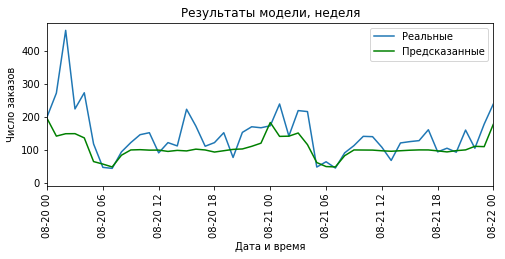

In [36]:
predictions1= pd.Series(predicted_test)
predictions1.index = target_test.index

fig2, ax = plt.subplots(figsize=(8, 3))
ax = sns.lineplot(data=target_test, label='Реальные')
sns.lineplot(data=predictions, color='green', label='Предсказанные')
plt.xticks(rotation=90)
plt.xlim('2018-08-20', '2018-08-22')
plt.title('Результаты модели, неделя')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')

Теперь проверим на модели Случайного леса

In [33]:
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
best_model1 = None
best_result1 = 10000
best_est1 = 0
best_depth1 = 0
for est in range(1, 70, 1):
    for depth in range (1, 8):
        model =   RandomForestRegressor(random_state=12345,n_estimators=est, max_depth= depth)
        model.fit(features_train,target_train) 
  #      predictions_test1= model.predict(features_test) 
        predicted_train2 = model.predict(features_train)
        predicted_test2 = model.predict(features_test)
        result = mean_absolute_error(target_train,predicted_train2)
        result_test = mean_absolute_error(target_test,predicted_test2)
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
        if result_test < best_result1:
            best_model1 = model
            best_result1 = result_test
            best_est1 = est
            best_depth1 = depth   
print("MAE обучающей выборки:",result,";","MAE тестовой выборки:",result_test,";" ,"Количество деревьев:", best_est, ";","Максимальная глубина:",depth)     
print("RMSE обучающей выборки:", mean_squared_error(target_train,predicted_train2)**0.5)
print("RMSE тестовой выборки:", mean_squared_error(target_test,predicted_test2)**0.5)

MAE обучающей выборки: 15.435873526749157 ; MAE тестовой выборки: 33.32638350389523 ; Количество деревьев: 63 ; Максимальная глубина: 7
RMSE обучающей выборки: 20.115250294407804
RMSE тестовой выборки: 47.08536191552764


Text(0, 0.5, 'Число заказов')

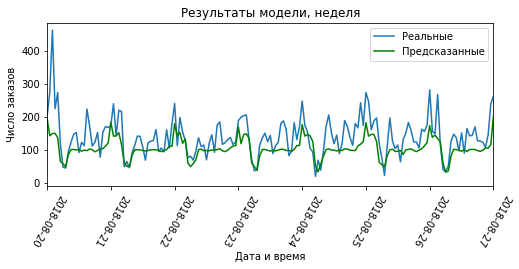

In [34]:
predictions = pd.Series(predicted_test2)
predictions.index = target_test.index

fig2, ax = plt.subplots(figsize=(8, 3))
ax = sns.lineplot(data=target_test, label='Реальные')
sns.lineplot(data=predictions, color='green', label='Предсказанные')
plt.xticks(rotation=240)
plt.xlim('2018-08-20', '2018-08-27')
plt.title('Результаты модели, неделя')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')

Text(0, 0.5, 'Число заказов')

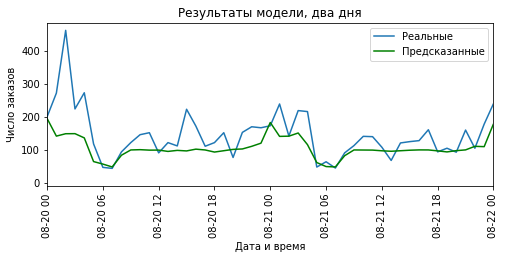

In [38]:
predictions = pd.Series(predicted_test2)
predictions.index = target_test.index

fig2, ax = plt.subplots(figsize=(8, 3))
ax = sns.lineplot(data=target_test, label='Реальные')
sns.lineplot(data=predictions, color='green', label='Предсказанные')
plt.xticks(rotation=90)
plt.xlim('2018-08-20', '2018-08-22')
plt.title('Результаты модели, два дня')
plt.xlabel('Дата и время')
plt.ylabel('Число заказов')

Значение RMSE тестовой выборки удалось получить меньше, чем 48 для обоих моделей. Предсказания у "случ

## Чек-лист проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48